# The mathematical building blocks of neural networks 

## A First Look at NN

In [24]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

In [28]:
# loading the mnist dataset in Keras
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Transform it into `float32` array of shape `60000,28*28`,
and `10000,28*28` with a values between 0 and 1

In [ ]:
# data preprocessing
train_X = train_X.reshape((60000, 28*28))
train_X = train_X.astype('float32') / 255

test_X = test_X.reshape((10000, 28*28))
test_X = test_X.astype('float32') / 255

layers--Think a layers of Hidden neurons work as a filter

In [6]:
# build network architecture
nn = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

- optimizer--The mechanism through which the model will update itself based on the training data it sees
- loss function--How the model will be able to measure its performance on the training data, and thus how it will be able steer itself in the right direction
- metrics--Monitor during training and testing

In [12]:
# compile step
nn.compile(optimizer='rmsprop',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

To train a model in `Keras` is done via call to the model's `fit()` 
method

In [8]:
# fitting the model
nn.fit(train_X, train_y, epochs=5, batch_size=128)

2022-02-04 22:09:07.048209: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-02-04 22:09:07.261204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 6ms/step - loss: 0.2539 - accuracy: 0.9269
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1022 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0678 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0491 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0362 - accuracy: 0.9894


Using trained model to predic class probabilities for new digits-images
that in the test set

In [9]:
# using the model to make prediction
test_digits = test_X[0:10]
predictions = nn.predict(test_digits)

print(predictions[5].argmax())
print(predictions[0][5])

# ground truth
print(test_y[5])

1
6.0337065e-08
1


2022-02-04 22:09:33.835631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Checking how good is our model at classifying such never-before-seen digits? by calling model's `evaluate() ` method


In [11]:
# evaluating the model on new data
test_loss, test_acc = nn.evaluate(test_X, test_y)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0633 - accuracy: 0.9803
Test accuracy: 0.9803000688552856


## Data representations for neural networks

A tensors are a generalization of matrices to an arbitrary number of dimensions

In [15]:
# scalars
# a tensor that contains only one number
x = np.array(26)
x.ndim

0

In [17]:
# vectors
# an array of numbers
x = np.array((8, 26))
x.ndim

1

In [18]:
# matrices
# an array of vectors 
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [19]:
# higher dimension tensor
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

Key attributes:
A tensor is defined by three key attributes: `number of axes`, `shape`, `data type`

In [23]:
# key attr
print('number of axes1:', x.ndim)
print('shape:', x.shape)
print('data types:', x.dtype)

number of axes1: 3
shape: (3, 3, 5)
data types: int64


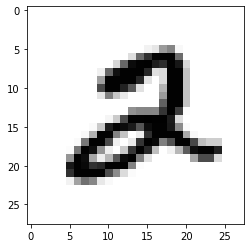

image label: 2


In [33]:
# displaying the digit
# loading the mnist dataset in Keras
(train_X, train_y), (test_X, test_y) = mnist.load_data()

digit = train_X[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print('image label:', train_y[5])

### Manipulating tensors in Numpy

In [34]:
# slicing 
my_slice = train_X[10:100]
my_slice.shape

(90, 28, 28)

### The notion of data batches

In [37]:
# batch 
batch1 = train_X[:128]
batch1.shape

(128, 28, 28)

In [38]:
# next batch
batch2 = train_X[128:128*2]

In [40]:
# the nth batch
n = 3
batch_size = 128

batchn = train_X[n*batch_size:(n+1)*batch_size]

### Real-world example of data tensor
- `vector data`--(**samples**, **features**)
- `timeseries data or sequence data`--(**samples**, **timesteps**, **features**)
- `Images`--(**samples**, **height**, **width**, **channels**)
- `Videos`--(**samples**, **frames**, **height**, **width**, **channels**)

### Geometric interpretation of tensor operation
- `Translation`--Adding a vector to a point will move the point by a fixed amount in a fixed direction.
- `Rotation`--A counterclockwise rotation of a 2D vector by an angle theta can be achieved via a dot product with 2 x 2 matrix **R** = `[[cos(theta),-sin(theta)],[sin(theta), cos[theta])`
- `Scaling`--A vertical and horizontal scaling of the image can be achieved via a dot product with 2 x 2 matrix **S** = `[[h_factor, 0], [0, v_factor]]`
- `Linear tranfrom` A dot product with an arbitrary matrix implements a linear transform.
- `Affine transform` An affine transform is the combination of a linear transform and translation.